In [14]:
from pandas import read_csv
import matplotlib.pyplot as plt
import traceback

In [15]:
class RegisterUser():
    def __init__(self,email:str,password:str) -> None:
        self.__exceptionsToInit(email,password)

        self.email:str = email
        self.password:str = password

    def __exceptionsToInit(self,email:str,password:str):
        if type(email) != type(""):
            raise TypeError('The parameter email must be a string')
        if len(email) == 0:
            raise ValueError('The email is an empty string')
        if type(password) != type(""):
            raise TypeError('The parameter password must be a string')
        if len(password) == 0:
            raise ValueError('The password is an empty string')


    def __str__(self) -> str:
        return "USER:"+self.email+"\n\t"+self.password+"\n"
    def __repr__(self) -> str:
        return self.__str__()

In [16]:
class DbConnectionUsr():
    def __init__(self,pathDbUsers:str) -> None:
        if type(pathDbUsers) != type(""):
            raise TypeError('The parameter pathDb must be a str')
        if len(pathDbUsers) == 0:
            raise TypeError('The path is an empty string')
        self.__pathDbUsers:str = pathDbUsers

    def getUsers(self):
        users = []
        db = read_csv(self.__pathDbUsers)
        emails = db['email'].to_list()
        passwords = db['password'].to_list()
        i= 0
        while i < len(emails):
            email = emails[i]
            password = passwords[i]
            u = RegisterUser(email,password)
            users.append(u)
            i+=1
        return users

In [17]:
class NodeTreeUsers():
    def __init__(self,user:RegisterUser) -> None:
        if type(user) != type(RegisterUser('a','a')):
            raise TypeError('User must be RegisterUser')
        self.user:RegisterUser = user
        self.parent:NodeTreeUsers = None
        self.left:NodeTreeUsers = None
        self.right:NodeTreeUsers = None

In [36]:
class BinaryTree():
    def __init__(self) -> None:
        self.__root:NodeTreeUsers = None
        self.cont = 0
        self.contE = 1

    def insertUser(self,user:RegisterUser):
        if self.__root == None:
            self.__root = NodeTreeUsers(user)
            self.__root.parent = None
            return True
        self.__insertUser(self.__root,user)


    def __insertUser(self,node:NodeTreeUsers,user:RegisterUser):
        if user.email < node.user.email:
            if node.left is None:
                node.left = NodeTreeUsers(user)
                # node.left.parent = node
                return True
            self.__insertUser(node.left,user)
        else:
            if node.right is None:
                node.right = NodeTreeUsers(user)
                # node.right.parent=node
                return True
            self.__insertUser(node.right,user)


    def build(self,listOfUsers:list):
        for register in listOfUsers:
            self.insertUser(register)
        return True

    def in_order(self):
        if self.__root == None:         #5
            self.cont=1
            self.contE = 1
            return None                 #2
        self.__in_order(self.__root)    #n
    #P(n) = n+7
    def __in_order(self,node:NodeTreeUsers): #n
        self.cont+=1
        if node == None:                        #4n
            x = len(traceback.extract_stack())
            self.contE = max(self.contE,x)
            return                              #1n
        self.__in_order(node.left)              #4n
        # print(node.user)
        self.__in_order(node.right)             #4n
    #P(n)=13n
    def pre_order(self):
        if self.__root == None:                 #5
            self.cont = 1
            self.contE = 1
            return None                         #2
        self.__pre_order(self.__root)           #n
    #P(n)=n+7
    def __pre_order(self,node:NodeTreeUsers):
        self.cont+=1
        if node == None:                        #4n
            x = len(traceback.extract_stack())
            self.contE = max(self.contE,x)
            return                              #1n
        # print(node.user)
        self.__pre_order(node.left)             #4n
        self.__pre_order(node.right)            #4n
    #P(n)=13n
    def post_order(self):
        if self.__root == None:             #5
            self.cont = 1
            self.contE=1
            return None                     #2
        self.__post_order(self.__root)      #n
    #P(n)=n+7
    def __post_order(self,node:NodeTreeUsers):      #n
        self.cont+=1
        if node == None:                       #4n
            x = len(traceback.extract_stack())
            self.contE = max(self.contE,x)
            return                             #1n
        self.__post_order(node.left)           #4n
        self.__post_order(node.right)          #4n
        # print(node.user)
    #P(n)=13n


In [37]:
def worstCaseE(i):
    import string
    l = string.ascii_letters
    return "".join([l[k%len(l)] for k in range(i)])


In [20]:
db = DbConnectionUsr('./users.csv')
users = db.getUsers()

# Complejidad Temporal

# Recorrido in_order
### Mejor Caso, Peor Caso y Caso promedio
El algoritmo <code>in_order</code> visita todo los nodos en nuestro árbol profundizando siempre en la rama mas izquierda, luego regresa a la raíz y al final va a la rama derecha por lo que si $n$ representa la cantidad de nodos que constituyen nuestro árbol binario entonces la complejidad de este algoritmo quedo en función de los nodos que hay a visitar por lo tanto, $n$ sera nuestra complejidad para cualquier caso pues no importa la forma del árbol, solo la cantidad de nodos.
$$\mathcal{O}(n)$$

Text(0.5, 0, 'Numero de nodos')

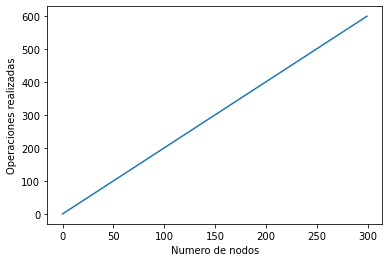

In [22]:
X = range(300)
Y = []
for i in X:
    t = BinaryTree()
    t.build(users[:i])
    t.in_order()
    Y.append(t.cont)
plt.plot(X,Y)
plt.ylabel('Operaciones realizadas')
plt.xlabel('Numero de nodos')

La relación es de 1 a 2 porque la función entra a $n$ subarboles vacíos,por ejemplo, las hojas y nodos intermedios incompletos.

# Recorrido pre_order
### Mejor Caso, Peor Caso y Caso promedio
El algoritmo <code>pre_order</code> cumple con la misma tarea que <code>in_order</code> visita todo los nodos del árbol pero imprimiendo la raíz antes, luego la rama izquierda y al final la derecha.De igual forma $n$ sera su complejidad pues pasara por cada uno de nuestros nodos en el árbol binario.
$$\mathcal{O}(n)$$

Text(0.5, 0, 'Numero de nodos')

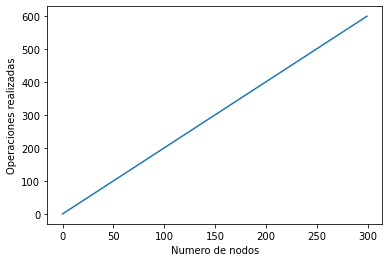

In [23]:
X = range(300)
Y = []
for i in X:
    t = BinaryTree()
    t.build(users[:i])
    t.pre_order()
    Y.append(t.cont)
plt.plot(X,Y)
plt.ylabel('Operaciones realizadas')
plt.xlabel('Numero de nodos')

# Recorrido post_order
### Mejor Caso, Peor Caso y Caso promedio
El algoritmo <code>post_order</code> cumple con la misma tarea que los dos anteriores algoritmos pero imprimiendo al final la raíz.
$$\mathcal{O}(n)$$

Text(0.5, 0, 'Numero de nodos')

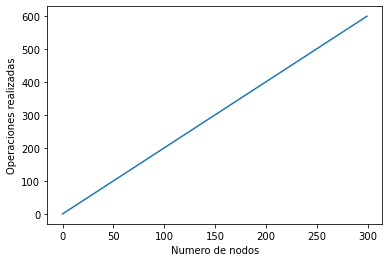

In [24]:
X = range(300)
Y = []
for i in X:
    t = BinaryTree()
    t.build(users[:i])
    t.post_order()
    Y.append(t.cont)
plt.plot(X,Y)
plt.ylabel('Operaciones realizadas')
plt.xlabel('Numero de nodos')

# Complejidad Espacial.

# In_order
## Peor caso
Considerando que las llamadas a fundiciones tienen un costo espacial, el peor caso sera cuando solo se desarrolle un rama, es decir, tengamos un árbol degenerado. La razón es que en la pila no se estará liberando pues hay un único nodo hoja pero para llegar a el tenemos que pasar por los $n$ nodos que tenga nuestro árbol.
$$Space(n)$$

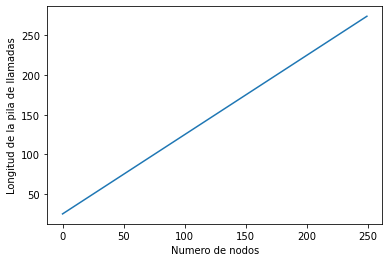

In [27]:
X = range(250)
t = BinaryTree()
Y = []
for i in X:
    e = worstCaseE(i+1)
    r = RegisterUser(e,"p")
    t.insertUser(r)
    t.in_order()
    Y.append(t.contE)
    t.contE = 0
plt.xlabel("Numero de nodos")
plt.ylabel("Longitud de la pila de llamadas")
plt.plot(X,Y)

## Mejor caso y caso promedio
En el mejor y promedio nuestro nodo estará en algún camino del árbol pero estos caminos, siempre y cuando el árbol sea balanceado, tendrán una longitud logarítmica base 2. Considerando que la pila se llena como máximo cuando se llega una hoja entonces la complejidad espacial es logarítmica.
$$\log_2(n)$$

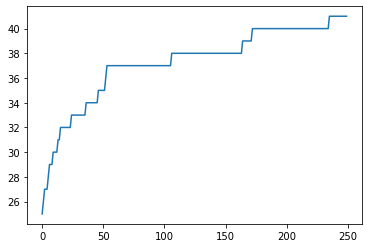

In [34]:
X = range(250)
Y = []
t = BinaryTree()
users = db.getUsers()
for i in X:
    t.insertUser(users[i])
    t.in_order()
    Y.append(t.contE)
    t.contE = 0
plt.plot(X,Y)

# Pre order
## Peor caso

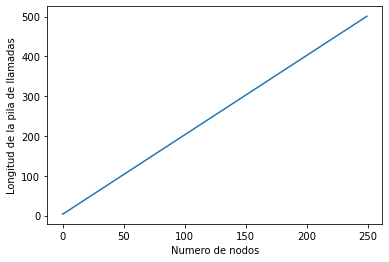

In [30]:
X = range(250)
t = BinaryTree()
Y = []
for i in X:
    e = worstCaseE(i+1)
    r = RegisterUser(e,"p")
    t.insertUser(r)
    t.pre_order()
    Y.append(t.contE)
    t.contE = 0
plt.xlabel("Numero de nodos")
plt.ylabel("Longitud de la pila de llamadas")
plt.plot(X,Y)

## Mejor y caso promedio

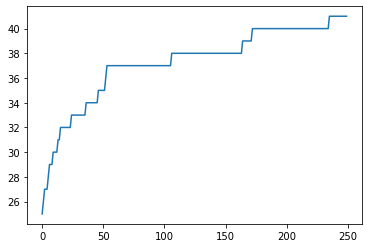

In [38]:
X = range(250)
Y = []
t = BinaryTree()
users = db.getUsers()
for i in X:
    t.insertUser(users[i])
    t.pre_order()
    Y.append(t.contE)
    t.contE = 0
plt.plot(X,Y)

# Post order
## Peor caso

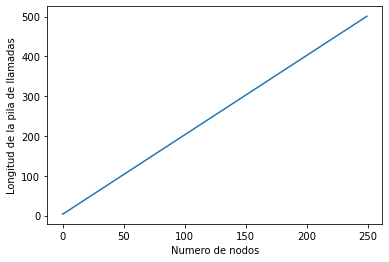

In [32]:
X = range(250)
t = BinaryTree()
Y = []
for i in X:
    e = worstCaseE(i+1)
    r = RegisterUser(e,"p")
    t.insertUser(r)
    t.post_order()
    Y.append(t.contE)
    t.contE = 0
plt.xlabel("Numero de nodos")
plt.ylabel("Longitud de la pila de llamadas")
plt.plot(X,Y)

## Mejor y caso promedio.

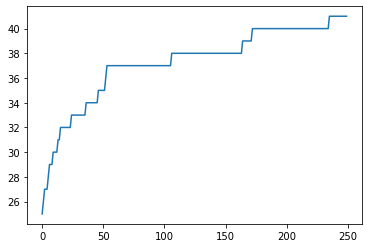

In [39]:
X = range(250)
Y = []
t = BinaryTree()
users = db.getUsers()
for i in X:
    t.insertUser(users[i])
    t.post_order()
    Y.append(t.contE)
    t.contE = 0
plt.plot(X,Y)